# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading existing infrastucture as of 2018

We need to load `.csv` files into individual dataframes

In [2]:
existing_infrastructure_df = pd.read_csv('../data/exisiting_EV_infrastructure_2018.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
existing_infrastructure_df.head(3)

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS
0,0,50.163110,19.412014,23,5,3
1,1,37.336451,58.119225,27,4,7
2,2,46.709232,57.525650,31,6,14


In [4]:
print(existing_infrastructure_df.shape)

(100, 6)


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
existing_infrastructure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
supply_point_index     100 non-null int64
x_coordinate           100 non-null float64
y_coordinate           100 non-null float64
total_parking_slots    100 non-null int64
existing_num_SCS       100 non-null int64
existing_num_FCS       100 non-null int64
dtypes: float64(2), int64(4)
memory usage: 4.8 KB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [6]:
existing_infrastructure_df.describe()

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,33.174596,35.901834,25.000000,5.700000,6.190000
std,29.011492,15.727673,15.453024,7.020892,2.426703,3.711013
min,0.000000,0.064819,1.315176,7.000000,1.000000,0.000000
25%,24.750000,22.369391,26.385616,20.750000,4.000000,3.000000
50%,49.500000,36.321027,38.621156,27.000000,6.000000,6.000000
75%,74.250000,46.988868,47.143322,30.000000,7.000000,9.000000
max,99.000000,56.568010,59.787741,36.000000,12.000000,16.000000


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [14]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

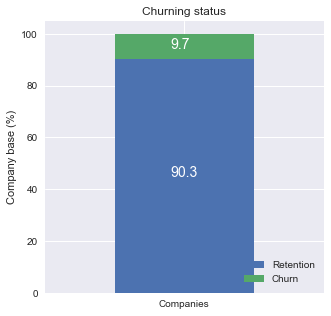

In [19]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [17]:
print(type(churn))

<class 'pandas.core.frame.DataFrame'>


The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

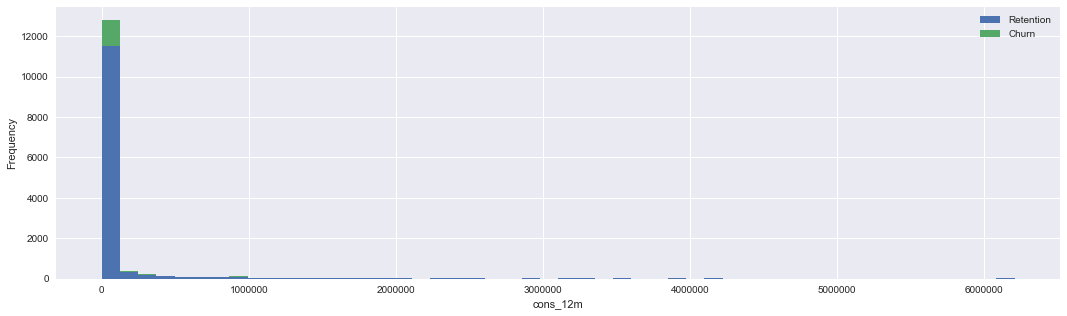

In [20]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

### Attempting my own plots

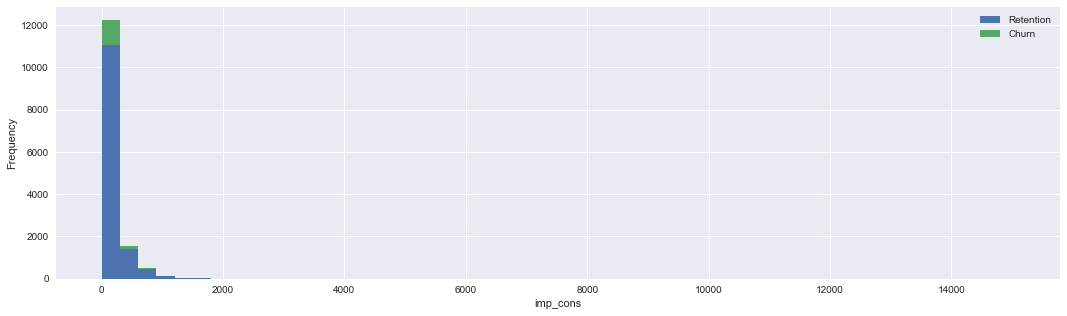

In [26]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'imp_cons', axs)

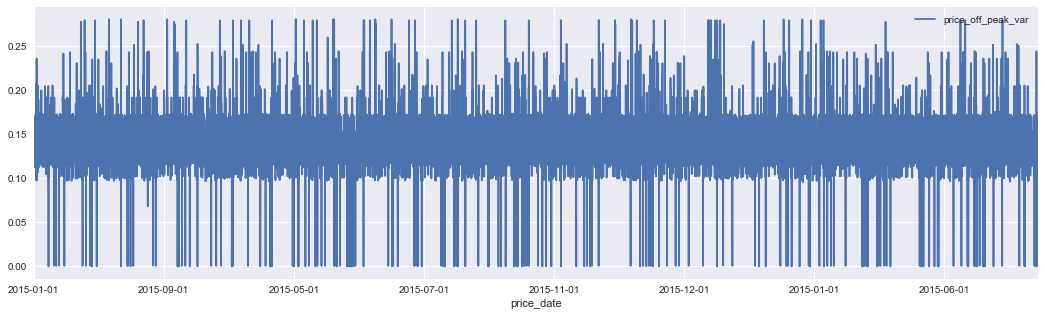

In [42]:
price_fluc = price_df[['price_date', 'price_off_peak_var']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

#price_fluc.plot(kind='hist', bins=50, ax=axs)
price_fluc.plot(kind='line', x='price_date', y='price_off_peak_var', ax=axs)
#axs.xlabel('hi')

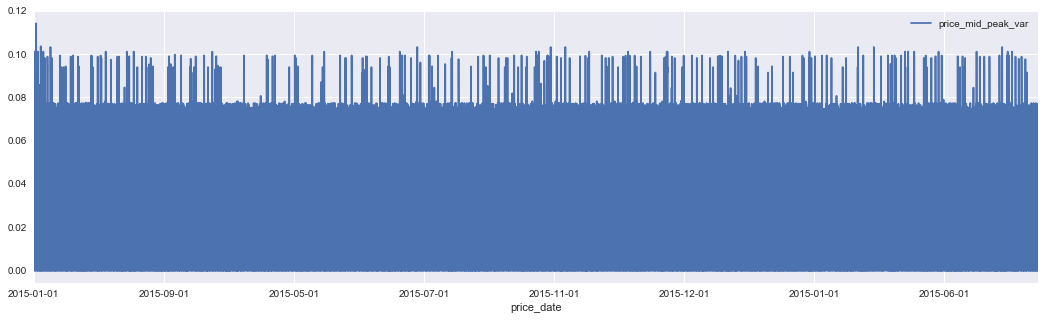

In [44]:
price_fluc = price_df[['price_date', 'price_mid_peak_var']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

#price_fluc.plot(kind='hist', bins=50, ax=axs)
price_fluc.plot(kind='line', x='price_date', y='price_mid_peak_var', ax=axs)
#axs.xlabel('hi')

In [29]:
temp = pd.DataFrame({"Price date": price_fluc["price_date"][column],
"Off peak var":price_fluc["price_off_peak_var"][column]})
# Plot the histogram
"""
temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
# X-axis label
ax.set_xlabel(column)
# Change the x-axis to plain style
ax.ticklabel_format(style='plain', axis='x')
"""

NameError: name 'column' is not defined